In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score as acc
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras import initializers
from keras.layers import Dropout, Activation, Embedding, Convolution1D, MaxPooling1D, Input, Dense, BatchNormalization, Flatten, Reshape, Concatenate, Bidirectional, LSTM
# from keras.layers.recurrent import LSTM, GRU
from keras.callbacks import Callback, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.models import Model
from keras.optimizers import Adam, SGD, RMSprop
from keras import regularizers

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Combined_News_DJIA.csv",  encoding = 'ISO-8859-1')

In [3]:
train = df[df['Date']<'20150101']
test = df[df['Date'] > '20141231']

In [4]:
print(train.size)
print(test.size)

50301
10206


In [7]:
print(train[train['Label']==0].size)
print(train[train['Label']==1].size)

print(test[test['Label']==0].size)
print(test[test['Label']==1].size)

23436
26865
5022
5184


In [4]:
data = train.iloc[:, 2:27]
data.replace("[^a-zA-Z]", " ", regex=True, inplace=True)
# data.replace("\W+", " ", regex=True, inplace=True)

In [5]:
list1 = [i for i in range(25)]
new_Index = [str(i) for i in list1]
data.columns = new_Index
data.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,b Georgia downs two Russian warplanes as cou...,b BREAKING Musharraf to be impeached,b Russia Today Columns of troops roll into So...,b Russian tanks are moving towards the capital...,b Afghan children raped with impunity U N ...,b Russian tanks have entered South Ossetia...,b Breaking Georgia invades South Ossetia Rus...,b The enemy combatent trials are nothing but...,b Georgian troops retreat from S Osettain cap...,b Did the U S Prep Georgia for War with Russia,b Rice Gives Green Light for Israel to Attack ...,b Announcing Class Action Lawsuit on Behalf of...,b So Russia and Georgia are at war and the N...,b China tells Bush to stay out of other countr...,b Did World War III start today,b Georgia Invades South Ossetia if Russia ge...,b Al Qaeda Faces Islamist Backlash,b Condoleezza Rice The US would not act to p...,b This is a busy day The European Union has ...,b Georgia will withdraw soldiers from Ir...,b Why the Pentagon Thinks Attacking Iran is a ...,b Caucasus in crisis Georgia invades South Os...,b Indian shoe manufactory And again in a se...,b Visitors Suffering from Mental Illnesses Ban...,b No Help for Mexico s Kidnapping Surge
1,b Why wont America and Nato help us If they w...,b Bush puts foot down on Georgian conflict,b Jewish Georgian minister Thanks to Israeli ...,b Georgian army flees in disarray as Russians ...,b Olympic opening ceremony fireworks faked,b What were the Mossad with fraudulent New Zea...,b Russia angered by Israeli military sale to G...,b An American citizen living in S Ossetia blam...,b Welcome To World War IV Now In High Definit...,b Georgia s move a mistake of monumental prop...,b Russia presses deeper into Georgia U S say...,b Abhinav Bindra wins first ever Individual Ol...,b U S ship heads for Arctic to define territ...,b Drivers in a Jerusalem taxi station threaten...,b The French Team is Stunned by Phelps and the...,b Israel and the US behind the Georgian aggres...,b Do not believe TV neither Russian nor Geor...,b Riots are still going on in Montreal Canada...,b China to overtake US as largest manufacturer,b War in South Ossetia PICS,b Israeli Physicians Group Condemns State Tort...,b Russia has just beaten the United States ov...,b Perhaps the question about the Georgia R...,b Russia is so much better at war,b So this is what it s come to trading sex fo...
2,b Remember that adorable year old who sang a...,b Russia ends Georgia operation,b If we had no sexual harassment we would hav...,b Al Qa eda is losing support in Iraq because ...,b Ceasefire in Georgia Putin Outmaneuvers the...,b Why Microsoft and Intel tried to kill the XO...,b Stratfor The Russo Georgian War and the Bal...,b I m Trying to Get a Sense of This Whole Geor...,b The US military was surprised by the timing ...,b U S Beats War Drum as Iran Dumps the Dollar,b Gorbachev Georgian military attacked the S...,b CNN use footage of Tskhinvali ruins to cover...,b Beginning a war as the Olympics were opening...,b pyramids as large as the Luxor stacked in...,b The Top Party Cities in the World,b U S troops still in Georgia did you know t...,b Why Russias response to Georgia was right,b Gorbachev accuses U S of making a serious ...,b Russia Georgia and NATO Cold War Two,b Remember that adorable year old who led y...,b War in Georgia The Israeli connection,b All signs point to the US encouraging Georgi...,b Christopher King argues that the US and NATO...,b America The New Mexico,b BBC NEWS Asia Pacific Extinction by man...
3,b U S refuses Israel weapons to attack Iran ...,b When the president ordered to attack Tskhinv...,b Israel clears troops who killed Reuters cam...,b Britain s policy of being tough on drugs is...,b Body of year old found in trunk Latest ...,b China has moved million quake survivors...,b Bush announces Operation Get All Up In Russi...,b Russian forces sink Georgian ships,b The commander of a Navy air reconnaissance s...,b of CNN readers Russia s ac

In [6]:
for index in new_Index:
    data[index] = data[index].str.lower()
data.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,b georgia downs two russian warplanes as cou...,b breaking musharraf to be impeached,b russia today columns of troops roll into so...,b russian tanks are moving towards the capital...,b afghan children raped with impunity u n ...,b russian tanks have entered south ossetia...,b breaking georgia invades south ossetia rus...,b the enemy combatent trials are nothing but...,b georgian troops retreat from s osettain cap...,b did the u s prep georgia for war with russia,b rice gives green light for israel to attack ...,b announcing class action lawsuit on behalf of...,b so russia and georgia are at war and the n...,b china tells bush to stay out of other countr...,b did world war iii start today,b georgia invades south ossetia if russia ge...,b al qaeda faces islamist backlash,b condoleezza rice the us would not act to p...,b this is a busy day the european union has ...,b georgia will withdraw soldiers from ir...,b why the pentagon thinks attacking iran is a ...,b caucasus in crisis georgia invades south os...,b indian shoe manufactory and again in a se...,b visitors suffering from mental illnesses ban...,b no help for mexico s kidnapping surge
1,b why wont america and nato help us if they w...,b bush puts foot down on georgian conflict,b jewish georgian minister thanks to israeli ...,b georgian army flees in disarray as russians ...,b olympic opening ceremony fireworks faked,b what were the mossad with fraudulent new zea...,b russia angered by israeli military sale to g...,b an american citizen living in s ossetia blam...,b welcome to world war iv now in high definit...,b georgia s move a mistake of monumental prop...,b russia presses deeper into georgia u s say...,b abhinav bindra wins first ever individual ol...,b u s ship heads for arctic to define territ...,b drivers in a jerusalem taxi station threaten...,b the french team is stunned by phelps and the...,b israel and the us behind the georgian aggres...,b do not believe tv neither russian nor geor...,b riots are still going on in montreal canada...,b china to overtake us as largest manufacturer,b war in south ossetia pics,b israeli physicians group condemns state tort...,b russia has just beaten the united states ov...,b perhaps the question about the georgia r...,b russia is so much better at war,b so this is what it s come to trading sex fo...


In [11]:
' '.join(str(x)[1:] for x in data.iloc[1, 0:25])  #example

' why wont america and nato help us  if they wont help us now  why did we help them in iraq    bush puts foot down on georgian conflict   jewish georgian minister  thanks to israeli training  we re fending off russia    georgian army flees in disarray as russians advance   gori abandoned to russia without a shot fired   olympic opening ceremony fireworks  faked    what were the mossad with fraudulent new zealand passports doing in iraq    russia angered by israeli military sale to georgia   an american citizen living in s ossetia blames u s  and georgian leaders for the genocide of innocent people   welcome to world war iv  now in high definition    georgia s move  a mistake of monumental proportions    russia presses deeper into georgia  u s  says regime change is goal   abhinav bindra wins first ever individual olympic gold medal for india    u s  ship heads for arctic to define territory   drivers in a jerusalem taxi station threaten to quit rather than work for their new boss   an 

In [7]:
headlines = []
for row in range(0, len(data.index)):
    headlines.append(' '.join(str(x)[1:] for x in data.iloc[row, 0:1]))

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [9]:
# implememt BAG OF WORDS
tfidfVector = TfidfVectorizer(ngram_range=(2,2))
#ngram(2,2) means it will combine the 2 words together and assign the value

trainDataset = tfidfVector.fit_transform(headlines)

In [10]:
randomClassifier = RandomForestClassifier(n_estimators=200, criterion='entropy')
randomClassifier.fit(trainDataset, train['Label'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [11]:
svmClassifier = svm.SVC(kernel='linear')
svmClassifier.fit(trainDataset, train['Label'])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
adaClassifier = AdaBoostClassifier(n_estimators=200)
adaClassifier.fit(trainDataset, train['Label'])

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=200, random_state=None)

In [23]:
baggingClassifier = BaggingClassifier(base_estimator=svm.SVC(),n_estimators=10, random_state=0)
baggingClassifier.fit(trainDataset, train['Label'])

BaggingClassifier(base_estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                     class_weight=None, coef0=0.0,
                                     decision_function_shape='ovr', degree=3,
                                     gamma='scale', kernel='rbf', max_iter=-1,
                                     probability=False, random_state=None,
                                     shrinking=True, tol=0.001, verbose=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=0, verbose=0, warm_start=False)

In [27]:
dtClassifier = DecisionTreeClassifier(random_state=0)
dtClassifier.fit(trainDataset, train['Label'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [12]:
testTransform =[]
for row in range(0, len(test.index)):
    testTransform.append(' '.join(str(x) for x in test.iloc[row, 2:3]))
    
test_dataset = tfidfVector.transform(testTransform)


In [28]:
# predictions = randomClassifier.predict(test_dataset)
# predictions = svmClassifier.predict(test_dataset)
# predictions = adaClassifier.predict(test_dataset)
# predictions = baggingClassifier.predict(test_dataset)
predictions = dtClassifier.predict(test_dataset)

In [12]:
# Random Forest
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
matrix = confusion_matrix(test['Label'], predictions)
print(matrix)
score = accuracy_score(test['Label'], predictions)
print(score)
report = classification_report(test['Label'], predictions)
print(report)

[[133  53]
 [  7 185]]
0.8412698412698413
              precision    recall  f1-score   support

           0       0.95      0.72      0.82       186
           1       0.78      0.96      0.86       192

    accuracy                           0.84       378
   macro avg       0.86      0.84      0.84       378
weighted avg       0.86      0.84      0.84       378



In [13]:
#SVM
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
matrix = confusion_matrix(test['Label'], predictions)
print(matrix)
score = accuracy_score(test['Label'], predictions)
print(score)
report = classification_report(test['Label'], predictions)
print(report)

[[142  44]
 [ 21 171]]
0.828042328042328
              precision    recall  f1-score   support

           0       0.87      0.76      0.81       186
           1       0.80      0.89      0.84       192

    accuracy                           0.83       378
   macro avg       0.83      0.83      0.83       378
weighted avg       0.83      0.83      0.83       378



In [20]:
#Adaboost
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
matrix = confusion_matrix(test['Label'], predictions)
print(matrix)
score = accuracy_score(test['Label'], predictions)
print(score)
report = classification_report(test['Label'], predictions)
print(report)

[[ 65 121]
 [ 16 176]]
0.6375661375661376
              precision    recall  f1-score   support

           0       0.80      0.35      0.49       186
           1       0.59      0.92      0.72       192

    accuracy                           0.64       378
   macro avg       0.70      0.63      0.60       378
weighted avg       0.70      0.64      0.61       378



In [25]:
#Bagging
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
matrix = confusion_matrix(test['Label'], predictions)
print(matrix)
score = accuracy_score(test['Label'], predictions)
print(score)
report = classification_report(test['Label'], predictions)
print(report)

[[117  69]
 [  4 188]]
0.8068783068783069
              precision    recall  f1-score   support

           0       0.97      0.63      0.76       186
           1       0.73      0.98      0.84       192

    accuracy                           0.81       378
   macro avg       0.85      0.80      0.80       378
weighted avg       0.85      0.81      0.80       378



In [29]:
#Decision Tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
matrix = confusion_matrix(test['Label'], predictions)
print(matrix)
score = accuracy_score(test['Label'], predictions)
print(score)
report = classification_report(test['Label'], predictions)
print(report)

[[137  49]
 [ 19 173]]
0.8201058201058201
              precision    recall  f1-score   support

           0       0.88      0.74      0.80       186
           1       0.78      0.90      0.84       192

    accuracy                           0.82       378
   macro avg       0.83      0.82      0.82       378
weighted avg       0.83      0.82      0.82       378



In [30]:
headlines = []
for row in range(0, len(data.index)):
    headlines.append(' '.join(str(x) for x in data.iloc[row, 0:5]))

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [31]:
# implememt BAG OF WORDS
tfidfVector = TfidfVectorizer(ngram_range=(2,2))
#ngram(2,2) means it will combine the 2 words together and assign the value

trainDataset = tfidfVector.fit_transform(headlines)

In [16]:
randomClassifier = RandomForestClassifier(n_estimators=200, criterion='entropy')
randomClassifier.fit(trainDataset, train['Label'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
svmClassifier = svm.SVC(kernel='linear')
svmClassifier.fit(trainDataset, train['Label'])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [36]:
adaClassifier = AdaBoostClassifier(n_estimators=200)
adaClassifier.fit(trainDataset, train['Label'])

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=200, random_state=None)

In [39]:
baggingClassifier = BaggingClassifier(base_estimator=svm.SVC(),n_estimators=10, random_state=0)
baggingClassifier.fit(trainDataset, train['Label'])

BaggingClassifier(base_estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                     class_weight=None, coef0=0.0,
                                     decision_function_shape='ovr', degree=3,
                                     gamma='scale', kernel='rbf', max_iter=-1,
                                     probability=False, random_state=None,
                                     shrinking=True, tol=0.001, verbose=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=0, verbose=0, warm_start=False)

In [42]:
dtClassifier = DecisionTreeClassifier(random_state=0)
dtClassifier.fit(trainDataset, train['Label'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [33]:
testTransform =[]
for row in range(0, len(test.index)):
    testTransform.append(' '.join(str(x) for x in test.iloc[row, 2:7]))
    
test_dataset = tfidfVector.transform(testTransform)

In [43]:
# predictions = randomClassifier.predict(test_dataset)
# predictions = svmClassifier.predict(test_dataset)
# predictions = adaClassifier.predict(test_dataset)
# predictions = baggingClassifier.predict(test_dataset)
predictions = dtClassifier.predict(test_dataset)

In [18]:
#Random Forest
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
matrix = confusion_matrix(test['Label'], predictions)
print(matrix)
score = accuracy_score(test['Label'], predictions)
print(score)
report = classification_report(test['Label'], predictions)
print(report)

[[140  46]
 [ 16 176]]
0.8359788359788359
              precision    recall  f1-score   support

           0       0.90      0.75      0.82       186
           1       0.79      0.92      0.85       192

    accuracy                           0.84       378
   macro avg       0.85      0.83      0.83       378
weighted avg       0.84      0.84      0.83       378



In [35]:
#SVM
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
matrix = confusion_matrix(test['Label'], predictions)
print(matrix)
score = accuracy_score(test['Label'], predictions)
print(score)
report = classification_report(test['Label'], predictions)
print(report)

[[144  42]
 [ 19 173]]
0.8386243386243386
              precision    recall  f1-score   support

           0       0.88      0.77      0.83       186
           1       0.80      0.90      0.85       192

    accuracy                           0.84       378
   macro avg       0.84      0.84      0.84       378
weighted avg       0.84      0.84      0.84       378



In [38]:
#Adaboost
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
matrix = confusion_matrix(test['Label'], predictions)
print(matrix)
score = accuracy_score(test['Label'], predictions)
print(score)
report = classification_report(test['Label'], predictions)
print(report)

[[118  68]
 [ 37 155]]
0.7222222222222222
              precision    recall  f1-score   support

           0       0.76      0.63      0.69       186
           1       0.70      0.81      0.75       192

    accuracy                           0.72       378
   macro avg       0.73      0.72      0.72       378
weighted avg       0.73      0.72      0.72       378



In [41]:
#Bagging
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
matrix = confusion_matrix(test['Label'], predictions)
print(matrix)
score = accuracy_score(test['Label'], predictions)
print(score)
report = classification_report(test['Label'], predictions)
print(report)

[[117  69]
 [  1 191]]
0.8148148148148148
              precision    recall  f1-score   support

           0       0.99      0.63      0.77       186
           1       0.73      0.99      0.85       192

    accuracy                           0.81       378
   macro avg       0.86      0.81      0.81       378
weighted avg       0.86      0.81      0.81       378



In [44]:
#Decision Tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
matrix = confusion_matrix(test['Label'], predictions)
print(matrix)
score = accuracy_score(test['Label'], predictions)
print(score)
report = classification_report(test['Label'], predictions)
print(report)

[[153  33]
 [ 36 156]]
0.8174603174603174
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       186
           1       0.83      0.81      0.82       192

    accuracy                           0.82       378
   macro avg       0.82      0.82      0.82       378
weighted avg       0.82      0.82      0.82       378



In [45]:
headlines = []
for row in range(0, len(data.index)):
    headlines.append(' '.join(str(x) for x in data.iloc[row, 0:10]))

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [46]:
# implememt BAG OF WORDS
tfidfVector = TfidfVectorizer(ngram_range=(2,2))
#ngram(2,2) means it will combine the 2 words together and assign the value

trainDataset = tfidfVector.fit_transform(headlines)

In [22]:
randomClassifier = RandomForestClassifier(n_estimators=200, criterion='entropy')
randomClassifier.fit(trainDataset, train['Label'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [47]:
svmClassifier = svm.SVC(kernel='linear')
svmClassifier.fit(trainDataset, train['Label'])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [52]:
adaClassifier = AdaBoostClassifier(n_estimators=200)
adaClassifier.fit(trainDataset, train['Label'])

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=200, random_state=None)

In [55]:
baggingClassifier = BaggingClassifier(base_estimator=svm.SVC(),n_estimators=10, random_state=0)
baggingClassifier.fit(trainDataset, train['Label'])

BaggingClassifier(base_estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                     class_weight=None, coef0=0.0,
                                     decision_function_shape='ovr', degree=3,
                                     gamma='scale', kernel='rbf', max_iter=-1,
                                     probability=False, random_state=None,
                                     shrinking=True, tol=0.001, verbose=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=0, verbose=0, warm_start=False)

In [58]:
dtClassifier = DecisionTreeClassifier(random_state=0)
dtClassifier.fit(trainDataset, train['Label'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [49]:
testTransform =[]
for row in range(0, len(test.index)):
    testTransform.append(' '.join(str(x) for x in test.iloc[row, 2:12]))
    
test_dataset = tfidfVector.transform(testTransform)

In [59]:
# predictions = randomClassifier.predict(test_dataset)
# predictions = svmClassifier.predict(test_dataset)
# predictions = adaClassifier.predict(test_dataset)
# predictions = baggingClassifier.predict(test_dataset)
predictions = dtClassifier.predict(test_dataset)

In [24]:
# Random Forest
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
matrix = confusion_matrix(test['Label'], predictions)
print(matrix)
score = accuracy_score(test['Label'], predictions)
print(score)
report = classification_report(test['Label'], predictions)
print(report)

[[144  42]
 [ 16 176]]
0.8465608465608465
              precision    recall  f1-score   support

           0       0.90      0.77      0.83       186
           1       0.81      0.92      0.86       192

    accuracy                           0.85       378
   macro avg       0.85      0.85      0.85       378
weighted avg       0.85      0.85      0.85       378



In [51]:
# SVM
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
matrix = confusion_matrix(test['Label'], predictions)
print(matrix)
score = accuracy_score(test['Label'], predictions)
print(score)
report = classification_report(test['Label'], predictions)
print(report)

[[144  42]
 [ 21 171]]
0.8333333333333334
              precision    recall  f1-score   support

           0       0.87      0.77      0.82       186
           1       0.80      0.89      0.84       192

    accuracy                           0.83       378
   macro avg       0.84      0.83      0.83       378
weighted avg       0.84      0.83      0.83       378



In [54]:
# Adaboost
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
matrix = confusion_matrix(test['Label'], predictions)
print(matrix)
score = accuracy_score(test['Label'], predictions)
print(score)
report = classification_report(test['Label'], predictions)
print(report)

[[121  65]
 [ 41 151]]
0.7195767195767195
              precision    recall  f1-score   support

           0       0.75      0.65      0.70       186
           1       0.70      0.79      0.74       192

    accuracy                           0.72       378
   macro avg       0.72      0.72      0.72       378
weighted avg       0.72      0.72      0.72       378



In [57]:
# Bagging
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
matrix = confusion_matrix(test['Label'], predictions)
print(matrix)
score = accuracy_score(test['Label'], predictions)
print(score)
report = classification_report(test['Label'], predictions)
print(report)

[[116  70]
 [  0 192]]
0.8148148148148148
              precision    recall  f1-score   support

           0       1.00      0.62      0.77       186
           1       0.73      1.00      0.85       192

    accuracy                           0.81       378
   macro avg       0.87      0.81      0.81       378
weighted avg       0.86      0.81      0.81       378



In [60]:
# Decision Tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
matrix = confusion_matrix(test['Label'], predictions)
print(matrix)
score = accuracy_score(test['Label'], predictions)
print(score)
report = classification_report(test['Label'], predictions)
print(report)

[[150  36]
 [ 49 143]]
0.7751322751322751
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       186
           1       0.80      0.74      0.77       192

    accuracy                           0.78       378
   macro avg       0.78      0.78      0.78       378
weighted avg       0.78      0.78      0.77       378



In [61]:
headlines = []
for row in range(0, len(data.index)):
    headlines.append(' '.join(str(x) for x in data.iloc[row, 0:15]))

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [62]:
# implememt BAG OF WORDS
tfidfVector = TfidfVectorizer(ngram_range=(2,2))
#ngram(2,2) means it will combine the 2 words together and assign the value

trainDataset = tfidfVector.fit_transform(headlines)

In [28]:
randomClassifier = RandomForestClassifier(n_estimators=200, criterion='entropy')
randomClassifier.fit(trainDataset, train['Label'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [63]:
svmClassifier = svm.SVC(kernel='linear')
svmClassifier.fit(trainDataset, train['Label'])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [68]:
adaClassifier = AdaBoostClassifier(n_estimators=200)
adaClassifier.fit(trainDataset, train['Label'])

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=200, random_state=None)

In [71]:
baggingClassifier = BaggingClassifier(base_estimator=svm.SVC(),n_estimators=10, random_state=0)
baggingClassifier.fit(trainDataset, train['Label'])

BaggingClassifier(base_estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                     class_weight=None, coef0=0.0,
                                     decision_function_shape='ovr', degree=3,
                                     gamma='scale', kernel='rbf', max_iter=-1,
                                     probability=False, random_state=None,
                                     shrinking=True, tol=0.001, verbose=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=0, verbose=0, warm_start=False)

In [74]:
dtClassifier = DecisionTreeClassifier(random_state=0)
dtClassifier.fit(trainDataset, train['Label'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [65]:
testTransform =[]
for row in range(0, len(test.index)):
    testTransform.append(' '.join(str(x) for x in test.iloc[row, 2:17]))
    
test_dataset = tfidfVector.transform(testTransform)


In [75]:
# predictions = randomClassifier.predict(test_dataset)
# predictions = svmClassifier.predict(test_dataset)
# predictions = adaClassifier.predict(test_dataset)
# predictions = baggingClassifier.predict(test_dataset)
predictions = dtClassifier.predict(test_dataset)

In [30]:
# Random Forest
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
matrix = confusion_matrix(test['Label'], predictions)
print(matrix)
score = accuracy_score(test['Label'], predictions)
print(score)
report = classification_report(test['Label'], predictions)
print(report)

[[148  38]
 [ 24 168]]
0.8359788359788359
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       186
           1       0.82      0.88      0.84       192

    accuracy                           0.84       378
   macro avg       0.84      0.84      0.84       378
weighted avg       0.84      0.84      0.84       378



In [67]:
# SVM
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
matrix = confusion_matrix(test['Label'], predictions)
print(matrix)
score = accuracy_score(test['Label'], predictions)
print(score)
report = classification_report(test['Label'], predictions)
print(report)

[[143  43]
 [ 19 173]]
0.8359788359788359
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       186
           1       0.80      0.90      0.85       192

    accuracy                           0.84       378
   macro avg       0.84      0.83      0.83       378
weighted avg       0.84      0.84      0.84       378



In [70]:
# Adaboost
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
matrix = confusion_matrix(test['Label'], predictions)
print(matrix)
score = accuracy_score(test['Label'], predictions)
print(score)
report = classification_report(test['Label'], predictions)
print(report)

[[136  50]
 [ 46 146]]
0.746031746031746
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       186
           1       0.74      0.76      0.75       192

    accuracy                           0.75       378
   macro avg       0.75      0.75      0.75       378
weighted avg       0.75      0.75      0.75       378



In [73]:
# Bagging
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
matrix = confusion_matrix(test['Label'], predictions)
print(matrix)
score = accuracy_score(test['Label'], predictions)
print(score)
report = classification_report(test['Label'], predictions)
print(report)

[[116  70]
 [  0 192]]
0.8148148148148148
              precision    recall  f1-score   support

           0       1.00      0.62      0.77       186
           1       0.73      1.00      0.85       192

    accuracy                           0.81       378
   macro avg       0.87      0.81      0.81       378
weighted avg       0.86      0.81      0.81       378



In [76]:
# Decision Tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
matrix = confusion_matrix(test['Label'], predictions)
print(matrix)
score = accuracy_score(test['Label'], predictions)
print(score)
report = classification_report(test['Label'], predictions)
print(report)

[[150  36]
 [ 34 158]]
0.8148148148148148
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       186
           1       0.81      0.82      0.82       192

    accuracy                           0.81       378
   macro avg       0.81      0.81      0.81       378
weighted avg       0.81      0.81      0.81       378



In [77]:
headlines = []
for row in range(0, len(data.index)):
    headlines.append(' '.join(str(x) for x in data.iloc[row, 0:20]))

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [78]:
# implememt BAG OF WORDS
tfidfVector = TfidfVectorizer(ngram_range=(2,2))
#ngram(2,2) means it will combine the 2 words together and assign the value

trainDataset = tfidfVector.fit_transform(headlines)

In [34]:
randomClassifier = RandomForestClassifier(n_estimators=200, criterion='entropy')
randomClassifier.fit(trainDataset, train['Label'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [79]:
svmClassifier = svm.SVC(kernel='linear')
svmClassifier.fit(trainDataset, train['Label'])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [83]:
adaClassifier = AdaBoostClassifier(n_estimators=200)
adaClassifier.fit(trainDataset, train['Label'])

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=200, random_state=None)

In [86]:
baggingClassifier = BaggingClassifier(base_estimator=svm.SVC(),n_estimators=10, random_state=0)
baggingClassifier.fit(trainDataset, train['Label'])

BaggingClassifier(base_estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                     class_weight=None, coef0=0.0,
                                     decision_function_shape='ovr', degree=3,
                                     gamma='scale', kernel='rbf', max_iter=-1,
                                     probability=False, random_state=None,
                                     shrinking=True, tol=0.001, verbose=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=0, verbose=0, warm_start=False)

In [89]:
dtClassifier = DecisionTreeClassifier(random_state=0)
dtClassifier.fit(trainDataset, train['Label'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [80]:
testTransform =[]
for row in range(0, len(test.index)):
    testTransform.append(' '.join(str(x) for x in test.iloc[row, 2:22]))
    
test_dataset = tfidfVector.transform(testTransform)

In [90]:
# predictions = randomClassifier.predict(test_dataset)
# predictions = svmClassifier.predict(test_dataset)
# predictions = adaClassifier.predict(test_dataset)
# predictions = baggingClassifier.predict(test_dataset)
predictions = dtClassifier.predict(test_dataset)

In [36]:
#Random Forest
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
matrix = confusion_matrix(test['Label'], predictions)
print(matrix)
score = accuracy_score(test['Label'], predictions)
print(score)
report = classification_report(test['Label'], predictions)
print(report)

[[149  37]
 [ 32 160]]
0.8174603174603174
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       186
           1       0.81      0.83      0.82       192

    accuracy                           0.82       378
   macro avg       0.82      0.82      0.82       378
weighted avg       0.82      0.82      0.82       378



In [82]:
#SVM
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
matrix = confusion_matrix(test['Label'], predictions)
print(matrix)
score = accuracy_score(test['Label'], predictions)
print(score)
report = classification_report(test['Label'], predictions)
print(report)

[[144  42]
 [ 16 176]]
0.8465608465608465
              precision    recall  f1-score   support

           0       0.90      0.77      0.83       186
           1       0.81      0.92      0.86       192

    accuracy                           0.85       378
   macro avg       0.85      0.85      0.85       378
weighted avg       0.85      0.85      0.85       378



In [85]:
#Adaboost
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
matrix = confusion_matrix(test['Label'], predictions)
print(matrix)
score = accuracy_score(test['Label'], predictions)
print(score)
report = classification_report(test['Label'], predictions)
print(report)

[[131  55]
 [ 45 147]]
0.7354497354497355
              precision    recall  f1-score   support

           0       0.74      0.70      0.72       186
           1       0.73      0.77      0.75       192

    accuracy                           0.74       378
   macro avg       0.74      0.73      0.73       378
weighted avg       0.74      0.74      0.74       378



In [88]:
#Bagging
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
matrix = confusion_matrix(test['Label'], predictions)
print(matrix)
score = accuracy_score(test['Label'], predictions)
print(score)
report = classification_report(test['Label'], predictions)
print(report)

[[116  70]
 [  0 192]]
0.8148148148148148
              precision    recall  f1-score   support

           0       1.00      0.62      0.77       186
           1       0.73      1.00      0.85       192

    accuracy                           0.81       378
   macro avg       0.87      0.81      0.81       378
weighted avg       0.86      0.81      0.81       378



In [91]:
#Decision Tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
matrix = confusion_matrix(test['Label'], predictions)
print(matrix)
score = accuracy_score(test['Label'], predictions)
print(score)
report = classification_report(test['Label'], predictions)
print(report)

[[154  32]
 [ 53 139]]
0.7751322751322751
              precision    recall  f1-score   support

           0       0.74      0.83      0.78       186
           1       0.81      0.72      0.77       192

    accuracy                           0.78       378
   macro avg       0.78      0.78      0.77       378
weighted avg       0.78      0.78      0.77       378



In [21]:
headlines = []
for row in range(0, len(data.index)):
    headlines.append(' '.join(str(x)[1:] for x in data.iloc[row, 0:25]))

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [22]:
# implememt BAG OF WORDS
tfidfVector = TfidfVectorizer(ngram_range=(2,2))
#ngram(2,2) means it will combine the 2 words together and assign the value

trainDataset = tfidfVector.fit_transform(headlines)

In [23]:
randomClassifier = RandomForestClassifier(n_estimators=200, criterion='entropy')
randomClassifier.fit(trainDataset, train['Label'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [94]:
svmClassifier = svm.SVC(kernel='linear')
svmClassifier.fit(trainDataset, train['Label'])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [98]:
adaClassifier = AdaBoostClassifier(n_estimators=200)
adaClassifier.fit(trainDataset, train['Label'])

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=200, random_state=None)

In [101]:
baggingClassifier = BaggingClassifier(base_estimator=svm.SVC(),n_estimators=10, random_state=0)
baggingClassifier.fit(trainDataset, train['Label'])

BaggingClassifier(base_estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                     class_weight=None, coef0=0.0,
                                     decision_function_shape='ovr', degree=3,
                                     gamma='scale', kernel='rbf', max_iter=-1,
                                     probability=False, random_state=None,
                                     shrinking=True, tol=0.001, verbose=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=0, verbose=0, warm_start=False)

In [104]:
dtClassifier = DecisionTreeClassifier(random_state=0)
dtClassifier.fit(trainDataset, train['Label'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [24]:
testTransform =[]
for row in range(0, len(test.index)):
    testTransform.append(' '.join(str(x)[1:] for x in test.iloc[row, 2:27]))
    
test_dataset = tfidfVector.transform(testTransform)

In [25]:
predictions = randomClassifier.predict(test_dataset)
# predictions = svmClassifier.predict(test_dataset)
# predictions = adaClassifier.predict(test_dataset)
# predictions = baggingClassifier.predict(test_dataset)
# predictions = dtClassifier.predict(test_dataset)

In [26]:
#Random Forest
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
matrix = confusion_matrix(test['Label'], predictions)
print(matrix)
score = accuracy_score(test['Label'], predictions)
print(score)
report = classification_report(test['Label'], predictions)
print(report)

[[150  36]
 [ 21 171]]
0.8492063492063492
              precision    recall  f1-score   support

           0       0.88      0.81      0.84       186
           1       0.83      0.89      0.86       192

    accuracy                           0.85       378
   macro avg       0.85      0.85      0.85       378
weighted avg       0.85      0.85      0.85       378



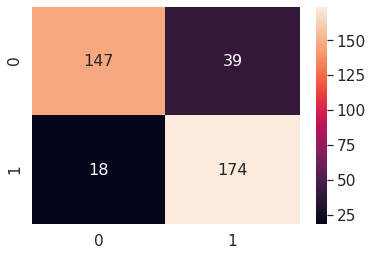

In [126]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = [[147, 39], [18,174]]
df_cm = pd.DataFrame(array, range(2), range(2))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt=".0f") # font size

plt.show()

In [41]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [45]:
import collections
wordlist_p = []
wordlist_n = []
total = []

for i in range(0,len(headlines)):
  # print(i)
  probs = randomClassifier.predict_proba(trainDataset[i])[0]
  if probs[1]>0.5:
    wordstring = headlines[i]
    word_tokens = wordstring.split()
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    wordlist_p.extend(filtered_sentence)
    total.extend(filtered_sentence)
  elif probs[0] > 0.5:
    wordstring = headlines[i]
    word_tokens = wordstring.split()
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    wordlist_n.extend(filtered_sentence)
    total.extend(filtered_sentence)

for i in range(0,len(testTransform)):
  # print(i)
  probs = randomClassifier.predict_proba(test_dataset[i])[0]
  if probs[1]>0.5:
    wordstring = testTransform[i]
    word_tokens = wordstring.split()
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    wordlist_p.extend(filtered_sentence)
    total.extend(filtered_sentence)
  elif probs[0] > 0.5:
    wordstring = testTransform[i]
    word_tokens = wordstring.split()
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    wordlist_n.extend(filtered_sentence)
    total.extend(filtered_sentence)

# wordfreq = [wordlist.count(w) for w in wordlist] # a list comprehension

total_counts = collections.Counter(total)
positive_counts = collections.Counter(wordlist_p)
negative_counts = collections.Counter(wordlist_n)

print(collections.Counter(wordlist_p))
print(sum(collections.Counter(wordlist_p).values()))
print(collections.Counter(wordlist_n))
print(sum(collections.Counter(wordlist_n).values()))

pos_neg_ratios = collections.Counter()
# Calculate the ratios of positive and negative uses of the most common words
# Consider words to be "common" if they've been used at least 100 times
for term,cnt in list(total_counts.most_common()):
    if(cnt > 100):
        pos_neg_ratio = positive_counts[term] / float(negative_counts[term]+1)
        pos_neg_ratios[term] = pos_neg_ratio

print(pos_neg_ratios.most_common()[0:20])
print(pos_neg_ratios.most_common()[::-1][0:20])


Counter({'says': 1584, 'us': 1324, 'new': 1237, 'government': 1215, 'world': 1127, 'people': 1044, 'police': 1020, 'israel': 948, 'year': 883, 'years': 873, 'war': 868, 'u': 861, 'first': 798, 'killed': 789, 'one': 768, 'china': 750, 'president': 744, 'said': 708, 'n': 699, 'state': 692, 'country': 635, 'military': 628, 'two': 625, 'korea': 624, 'russia': 609, 'found': 599, 'court': 584, 'uk': 578, 'could': 575, 'minister': 574, 'nuclear': 574, 'attack': 573, 'israeli': 561, 'death': 538, 'news': 516, 'may': 509, 'million': 509, 'rights': 504, 'women': 502, 'law': 500, 'old': 495, 'russian': 490, 'man': 487, 'iran': 484, 'say': 479, 'would': 477, 'report': 472, 'amp': 470, 'human': 457, 'time': 446, 'north': 446, 'gaza': 444, 'oil': 441, 'un': 432, 'hina': 425, 'children': 419, 'dead': 412, 'last': 398, 'syria': 396, 'anti': 392, 'chinese': 383, 'forces': 383, 'international': 380, 'city': 377, 'south': 372, 'bank': 370, '-': 365, 'use': 364, 'calls': 363, 'drug': 357, 'ban': 354, 'arr

In [97]:
#SVM
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
matrix = confusion_matrix(test['Label'], predictions)
print(matrix)
score = accuracy_score(test['Label'], predictions)
print(score)
report = classification_report(test['Label'], predictions)
print(report)

[[140  46]
 [ 12 180]]
0.8465608465608465
              precision    recall  f1-score   support

           0       0.92      0.75      0.83       186
           1       0.80      0.94      0.86       192

    accuracy                           0.85       378
   macro avg       0.86      0.85      0.84       378
weighted avg       0.86      0.85      0.85       378



In [100]:
#Adaboost
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
matrix = confusion_matrix(test['Label'], predictions)
print(matrix)
score = accuracy_score(test['Label'], predictions)
print(score)
report = classification_report(test['Label'], predictions)
print(report)

[[140  46]
 [ 51 141]]
0.7433862433862434
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       186
           1       0.75      0.73      0.74       192

    accuracy                           0.74       378
   macro avg       0.74      0.74      0.74       378
weighted avg       0.74      0.74      0.74       378



In [103]:
#Bagging
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
matrix = confusion_matrix(test['Label'], predictions)
print(matrix)
score = accuracy_score(test['Label'], predictions)
print(score)
report = classification_report(test['Label'], predictions)
print(report)

[[116  70]
 [  0 192]]
0.8148148148148148
              precision    recall  f1-score   support

           0       1.00      0.62      0.77       186
           1       0.73      1.00      0.85       192

    accuracy                           0.81       378
   macro avg       0.87      0.81      0.81       378
weighted avg       0.86      0.81      0.81       378



In [106]:
#Decision Tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
matrix = confusion_matrix(test['Label'], predictions)
print(matrix)
score = accuracy_score(test['Label'], predictions)
print(score)
report = classification_report(test['Label'], predictions)
print(report)

[[152  34]
 [ 39 153]]
0.8068783068783069
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       186
           1       0.82      0.80      0.81       192

    accuracy                           0.81       378
   macro avg       0.81      0.81      0.81       378
weighted avg       0.81      0.81      0.81       378

